Copyright © 2025 Technical University of Denmark

In [1]:
from os import chdir
chdir('../')

In [2]:
from breeding import sim_breeding_circuit
from lcg_plus.effective_sqz import effective_sqz
from lcg_plus.conversions import Delta_to_dB
from catprep import get_input_sq_cat
import numpy as np
import seaborn as sns
import matplotlib as mpl
hbar = 2
colwidth = 3.41667


In [3]:
def f1(p1,p2, mu):
    return 2*np.exp(1j*np.sqrt(2/3)*p2*mu / hbar) * np.cos(np.sqrt(2)*p1* mu/hbar) + np.exp(-1j*2*np.sqrt(2/3)*p2*mu/hbar)

def f2(p1,p2, mu):
    return 2*np.exp(-1j*np.sqrt(2/3)*p2*mu / hbar) * np.cos(np.sqrt(2)*p1* mu/hbar) + np.exp(1j*2*np.sqrt(2/3)*p2*mu/hbar)


In [4]:
num = 3
N = 200
r_dB = -12
parity = 0
which = 'square'
eta = 1

ps = np.linspace(-1.5,1.5,N)*np.sqrt(2*np.pi*hbar) 

#ps = np.linspace(-5,5,N)*np.sqrt(2*np.pi*hbar)  #For checking that probs sum to 1

cat = get_input_sq_cat(num, r_dB, parity, which, eta)
mu = cat.means[0][0]
print(mu)



(3.069980123839465+0j)


In [11]:
probs = np.zeros((N,N))
Dp = np.zeros((N,N))
fs = np.zeros((N,N), dtype='complex')

for i, p1 in enumerate(ps):
    for j, p2 in enumerate(ps):
        out, prob = sim_breeding_circuit(cat, num, np.ones(num-1)*np.pi/2, np.array([p1,p2]))
        #Dx[i,j] = effective_sqz(out, 'rx')
        Dp[i,j] = effective_sqz(out, 'sp')

        probs[i,j] = prob

        fs[i,j] = f1(p1,p2,mu)






In [15]:
#np.save(f'results/N=3/Dp_eta={eta}.npy', Dp)
#np.save(f'results/N=3/probs_eta={eta}.npy', probs)
#fs = np.save(f'results/N=3/fs_eta={eta}.npy', fs)
#ps = np.save(f'results/N=3/ps_eta={eta}.npy', ps)

Dp = np.load(f'N=3/Dp_eta={eta}.npy')
probs = np.load(f'N=3/probs_eta={eta}.npy')
fs = np.load(f'N=3/fs_eta={eta}.npy')
ps = np.load(f'N=3/ps_eta={eta}.npy')

In [16]:
cmap = sns.color_palette("hls", n_colors = 8)
c = cmap[1]

c  = 'w'

def plot_grid(ax, grid, c =c,s= 2):
    
    a = hbar * np.pi/2/(mu*np.sqrt(2))
    b = hbar*np.pi/2 / (2*np.sqrt(2/3)*mu)
    d = np.sqrt(a**2 + b**2)
    
    phases = np.array([0,np.pi/3, 2*np.pi/3, np.pi, 4*np.pi/3, 5*np.pi/3])
    ds = d*np.exp(1j*phases)
    
    kwargs = {'c': c, 's': s}
    for d in ds:
        ax.scatter(d.real/grid,d.imag/grid, **kwargs)
   
def plot_cbar(ax, im, label = None):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax = cax, label = label)
    
        
    

In [17]:
a = hbar*np.pi/2/(mu*np.sqrt(2))
b = hbar*np.pi/2 / (2*np.sqrt(2/3)*mu)
d = np.sqrt(a**2 + b**2)
print(d)
print(1/4 * np.pi*hbar/mu * np.sqrt(7/2))

(0.9572344839677598+0j)
(0.9572344839677596+0j)


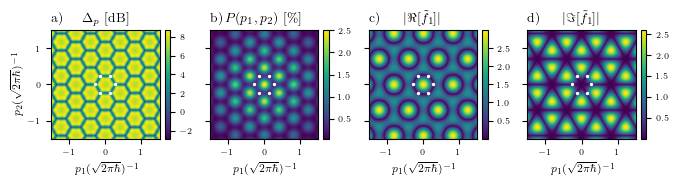

In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams.update({'font.size': 8, 
                     "text.usetex": True, 
                     'font.family':'serif', 
                     'xtick.labelsize': 6, 
                     'ytick.labelsize':6})

cmap = sns.color_palette('viridis', as_cmap = True)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharex = True, sharey = True, figsize=(colwidth*2,colwidth))
grid = np.sqrt(2*np.pi*hbar)
extent = [np.min(ps), np.max(ps), np.min(ps), np.max(ps)]/grid 
im1 = ax1.imshow(Delta_to_dB(Dp.T), extent = extent, cmap = cmap)
ax1.set_title(r'$\Delta_p$ [dB]')
ax1.set_title(r'a)', loc = 'left')
plot_cbar(ax1, im1)
plot_grid(ax1,grid)

im2 = ax2.imshow(probs.T*100, extent = extent,  cmap = cmap)
ax2.set_title(r'$ P(p_1,p_2)$ [\%]')
ax2.set_title(r'b)', loc = 'left')
plot_cbar(ax2, im2)
plot_grid(ax2, grid)

im3 = ax3.imshow(np.abs(fs.real).T, extent = extent,  cmap = cmap)
ax3.set_title(r'$|\Re[\tilde{f}_{1}]|$')
ax3.set_title(r'c)', loc = 'left')
plot_cbar(ax3, im3)
plot_grid(ax3, grid)
#ax3.set_aspect('equal')

im4 = ax4.imshow(np.abs(fs.imag).T, extent = extent,  cmap = cmap)
ax4.set_title(r'$|\Im[\tilde{f}_{1}]|$')
ax4.set_title(r'd)', loc = 'left')
plot_cbar(ax4, im4)


ax1.set_ylabel(r'$p_2(\sqrt{2\pi\hbar})^{-1}$')
ax2.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')
ax3.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')
ax4.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')
ax1.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')
plot_grid(ax4, grid)
plt.tight_layout()
plt.savefig('figures/N=3_p1p2.pdf', dpi = 800,  bbox_inches='tight')
plt.show()


# Get Wigner functions at specific p1, p2 points for a given loss value

In [20]:
from lcg_plus.plotting import plot_wigner_marginals
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

0 [0.+0.j 0.+0.j]
Dx 11.999999997973108
Dp 7.372070783286341
1 [0.27003086+0.j 0.        +0.j]
Dx 11.99999999992168
Dp -3.5306358308569106
2 [0.08181818+0.j 0.14242424+0.j]
Dx 11.999999997813646
Dp 8.69869429915726
3 [0.20252315+0.j 0.11692679+0.j]
Dx 11.999999999585182
Dp 0.5709778602844506


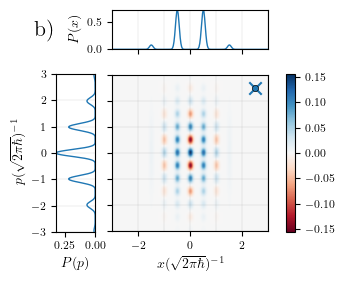

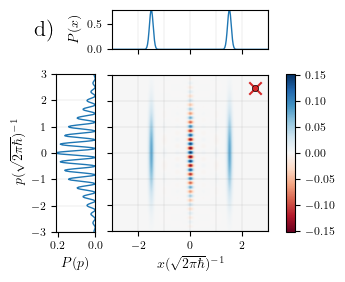

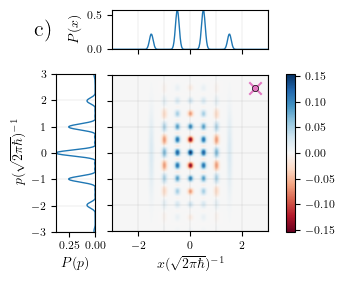

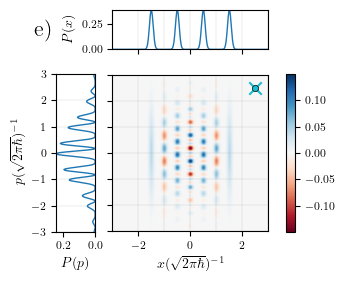

In [32]:
eta = 1
num = 3
r_dB = -12
parity = 0
grid = 'square'

cat = get_input_sq_cat(num, r_dB, parity, grid, eta )
mu = cat.means[0][0]

cmap = sns.color_palette('tab10', as_cmap = True)
colors = cmap(np.linspace(0,1, 4)) 


#Points of interest
p0 = np.array([0,0])

d = 1/4 * np.pi*hbar/mu * np.sqrt(7/2)
p1 = np.array([d,0])

p2 = np.array([0.2900379, 0.50488079])
#p2 = np.array([d*np.sin(np.pi/3)*np.cos(np.pi/6),0])
ph2  = np.pi/6
r2 = d *np.exp(1j*ph2)

p3 = np.array([d*np.sin(np.pi/3)*np.cos(np.pi/6), d*np.sin(np.pi/3)*np.sin(np.pi/6)])

pvals = np.vstack((p0,p1,p2,p3))
grid = np.sqrt(2*np.pi*hbar)

x = np.linspace(-4,4,300)*grid

fs = 10
kwargs = {'grid': 'square', 
          'fontsize' : fs, 
          'title': None, 
          'figsize' :(colwidth,colwidth), 
          'linewidth':1,
          'xlim': 3,
          'plim': 3}

mpl.rcParams.update({'font.size': 10, 
                     "text.usetex": True, 
                     'font.family':'serif', 
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8})

labels = ['b)', 'd)', 'c)', 'e)']
#labels = ['c)', 'e)', 'd)', 'f)']

#p = np.linspace(-10,10,300)
for i, pi in enumerate(pvals):
    print(i, pi/grid)
    out, prob = sim_breeding_circuit(cat, num, np.ones(num-1)*np.pi/2, pi)
    W = out.get_wigner_bosonic(x,x)
    
    fig, ax, axx, axp, cax = plot_wigner_marginals(W,x,x, **kwargs)
    print('Dx', Delta_to_dB(effective_sqz(out, 'sx')))
    print('Dp', Delta_to_dB(effective_sqz(out, 'sp')))

    #print('Dx_h', Delta_to_dB(effective_sqz(out, 'hsx')))
    #print('Dp_h', Delta_to_dB(effective_sqz(out, 'hsp')))
    
    ax.scatter(2.5,2.5, marker='x', color = colors[i],s=80) 
    ax.scatter(2.5, 2.5, marker='.', color = colors[i],s=80,edgecolor = 'k', linewidth=0.5)

    #ax.scatter(2.5,2.5, s = 30, marker='x', color = colors[i])
    axx.text(-0.5, 1.25, labels[i], fontsize = 16, transform=ax.transAxes)
    plt.savefig(f'figures/Wp{i}_eta={eta}.pdf',dpi=800, bbox_inches = 'tight')



In [33]:
def plot_points(ax, pvals, s = 10):
    
    for i, p in enumerate(pvals):
        ax.scatter(p[0]/grid,p[1]/grid, marker='x', color = colors[i],s=s)
        ax.scatter(p[0]/grid,p[1]/grid, marker='.', color = colors[i],s=s,edgecolor = 'k', linewidth=0.5)
        

In [34]:
N = 200
Dp = np.zeros((N,N))
Dx = np.zeros((N,N))
ps = np.linspace(-0.3,0.3,N)*grid

for i, p1 in enumerate(ps):
    for j, p2 in enumerate(ps):
        out, prob = sim_breeding_circuit(cat, num, np.ones(num-1)*np.pi/2, np.array([p1,p2]))
        Dx[i,j] = effective_sqz(out, 'sx')
        Dp[i,j] = effective_sqz(out, 'sp')


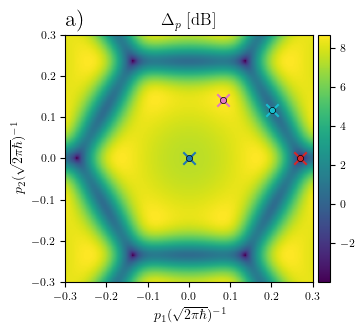

In [35]:
extent = [np.min(ps), np.max(ps), np.min(ps), np.max(ps)]/grid
fig, ax = plt.subplots(1, figsize = (colwidth,colwidth))


#im = ax.imshow(Delta_to_dB(Dx.T), extent = extent)
#ax.set_title(r'$\Delta_x$ [dB]')
#ax.set_title('b)', loc = 'left', fontsize = 16)

im = ax.imshow(Delta_to_dB(Dp.T), extent = extent)
ax.set_title(r'$\Delta_p$ [dB]')
ax.set_title('a)', loc = 'left', fontsize=16)

ax.set_ylabel(r'$p_2(\sqrt{2\pi\hbar})^{-1}$')
ax.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')

plot_cbar(ax,im)

plot_points(ax, pvals, 80)
plt.savefig(f'figures/Dp_zoom_eta={eta}.pdf', dpi=800, bbox_inches ='tight')

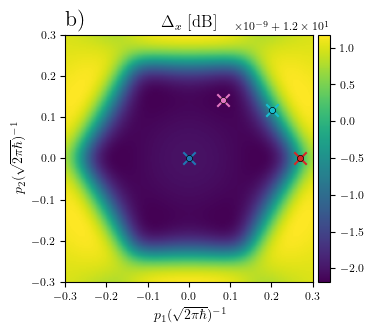

In [36]:
extent = [np.min(ps), np.max(ps), np.min(ps), np.max(ps)]/grid
fig, ax = plt.subplots(1, figsize = (colwidth,colwidth))


im = ax.imshow(Delta_to_dB(Dx.T), extent = extent)
ax.set_title(r'$\Delta_x$ [dB]')
ax.set_title('b)', loc = 'left', fontsize=16)

ax.set_ylabel(r'$p_2(\sqrt{2\pi\hbar})^{-1}$')
ax.set_xlabel(r'$p_1(\sqrt{2\pi\hbar})^{-1}$')

plot_cbar(ax,im)

#ax.scatter(ps[12]/grid,ps[22]/grid)

plot_points(ax, pvals, 80)
plt.savefig(f'figures/Dx_zoom_eta={eta}.pdf', dpi=800, bbox_inches ='tight')